In [1]:
import pandas as pd
import os
from itables import show
import matplotlib.pyplot as plt

# Meteostat

In [2]:
pip install meteostat

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

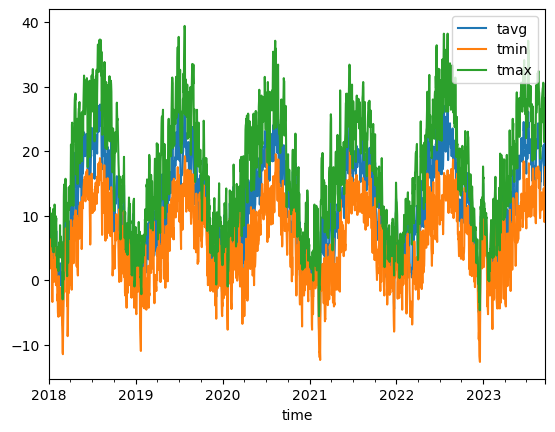

In [44]:
# Set time period
start = datetime(2018, 1, 1)
end = datetime(2023, 9, 18)

# Create Point for Darmstadt (elevation Luisenplatz = 147m)
darmstadt = Point(49.8728, 8.6512, 147)

#get daily data
data = Daily(darmstadt, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

### Verify that there is a weather station in Darmstadt

In [14]:
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(49.8728, 8.6512)
station = stations.fetch(1)

# Print DataFrame
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
D0917,Darmstadt,DE,HE,<NA>,<NA>,49.8809,8.6779,162.0,Europe/Berlin,1981-01-01,2023-09-13,1995-08-01,2023-09-13,1995-01-01,2022-01-01,2114.658927


## Get hourly weather data for Darmstadt

In [3]:

from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2022, 12, 31, 23, 59)

# Get hourly data
data = Hourly('D0917', start, end)
data = data.fetch()

data


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2018-01-01 00:00:00,11.0,5.7,70.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,10.4,5.6,72.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,10.0,4.8,70.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,9.5,3.7,67.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2018-01-01 04:00:00,9.3,3.5,67.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,14.4,7.9,65.0,0.0,NaN,213.0,21.2,NaN,1016.2,NaN,3.0
2022-12-31 20:00:00,14.7,8.0,64.0,0.0,NaN,212.0,20.9,NaN,1016.3,NaN,3.0
2022-12-31 21:00:00,14.9,7.9,63.0,0.0,NaN,211.0,21.2,NaN,1016.8,NaN,3.0


# Weather data City Darmstadt

In [2]:
weather_data = pd.read_csv('D:\\Data Science\\VS Code\\final_project\\Luftmessung_Darmstadt\\Darmstadt_Wetter.txt', sep=';')

# Convert 'Datum' and 'Zeit' columns to datetime
weather_data['date'] = pd.to_datetime(weather_data['Datum'], format='%d.%m.%Y')
weather_data['Zeit'] = weather_data['Zeit'].replace('24:00', '00:00')
weather_data['Zeit'] = pd.to_datetime(weather_data['Zeit'], format='%H:%M')

# Create a 'datetime' column by combining 'date' and 'Zeit'
weather_data['datetime'] = pd.to_datetime(weather_data['date'].dt.strftime('%Y-%m-%d') + ' ' + weather_data['Zeit'].dt.strftime('%H:%M:%S'))


# Calculate the 'hours_since_midnight'
weather_data['hours_since_midnight'] = weather_data['Zeit'].dt.hour

# Create the 'hour' column with hourly timestamps
weather_data['timestamp'] = pd.to_datetime(weather_data['datetime'].dt.date.astype(str) + ' ' + weather_data['hours_since_midnight'].astype(str) + ':00:00')

# Drop the 'Zeit' column
weather_data.drop(columns=['Zeit', 'date', 'Datum', 'datetime', 'hours_since_midnight', 'Unnamed: 7'], inplace=True)

weather_data


,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],timestamp
0,1004,"61,0","11,5","2,6",235,2018-01-01 00:00:00
1,1004,"62,7","11,0","2,7",244,2018-01-01 01:00:00
2,1004,"64,0","10,7","2,0",229,2018-01-01 01:00:00
3,1004,"65,5","10,4","2,1",235,2018-01-01 02:00:00
4,1005,"65,0","10,2","2,6",243,2018-01-01 02:00:00
...,...,...,...,...,...,...
100143,1007,"85,2","18,9","0,8",166,2023-09-18 08:00:00
100144,1007,"81,6","19,4","0,9",157,2023-09-18 08:00:00
100145,1007,"79,8","19,8","1,2",173,2023-09-18 09:00:00
100146,1007,"76,4","20,4","1,2",176,2023-09-18 09:00:00


In [3]:
columns_to_convert = ['Luftdruck[hPa]', 'Relative Luftfeuchtigkeit[%]', 'Temperatur[°C]', 'Windgeschwindigkeit[m/s]', 'Windrichtung[Grad]']
for column in columns_to_convert:
    weather_data[column] = weather_data[column].str.replace(',', '.')


weather_data[columns_to_convert] = weather_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [5]:
weather_data = weather_data.groupby('timestamp').mean().round(2)
weather_data = weather_data.reset_index()
weather_data.head()

,timestamp,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad]
0,2018-01-01 00:00:00,1002.5,75.75,8.85,2.50,242.5
1,2018-01-01 01:00:00,1004.0,63.35,10.85,2.35,236.5
2,2018-01-01 02:00:00,1004.5,65.25,10.30,2.35,239.0
3,2018-01-01 03:00:00,1005.0,63.05,10.05,2.30,240.0
4,2018-01-01 04:00:00,1006.0,60.95,9.55,2.45,241.0


In [6]:
weather_data.to_csv('weather_data_hourly.csv', index= False)

# Plots

## Weather data per year

In [9]:
weather_data_plot = weather_data.copy()

In [10]:
# prerequisits

# Extract the year from the 'datetime' column and create a new 'year' column
weather_data_plot['year'] = weather_data_plot['timestamp'].dt.year



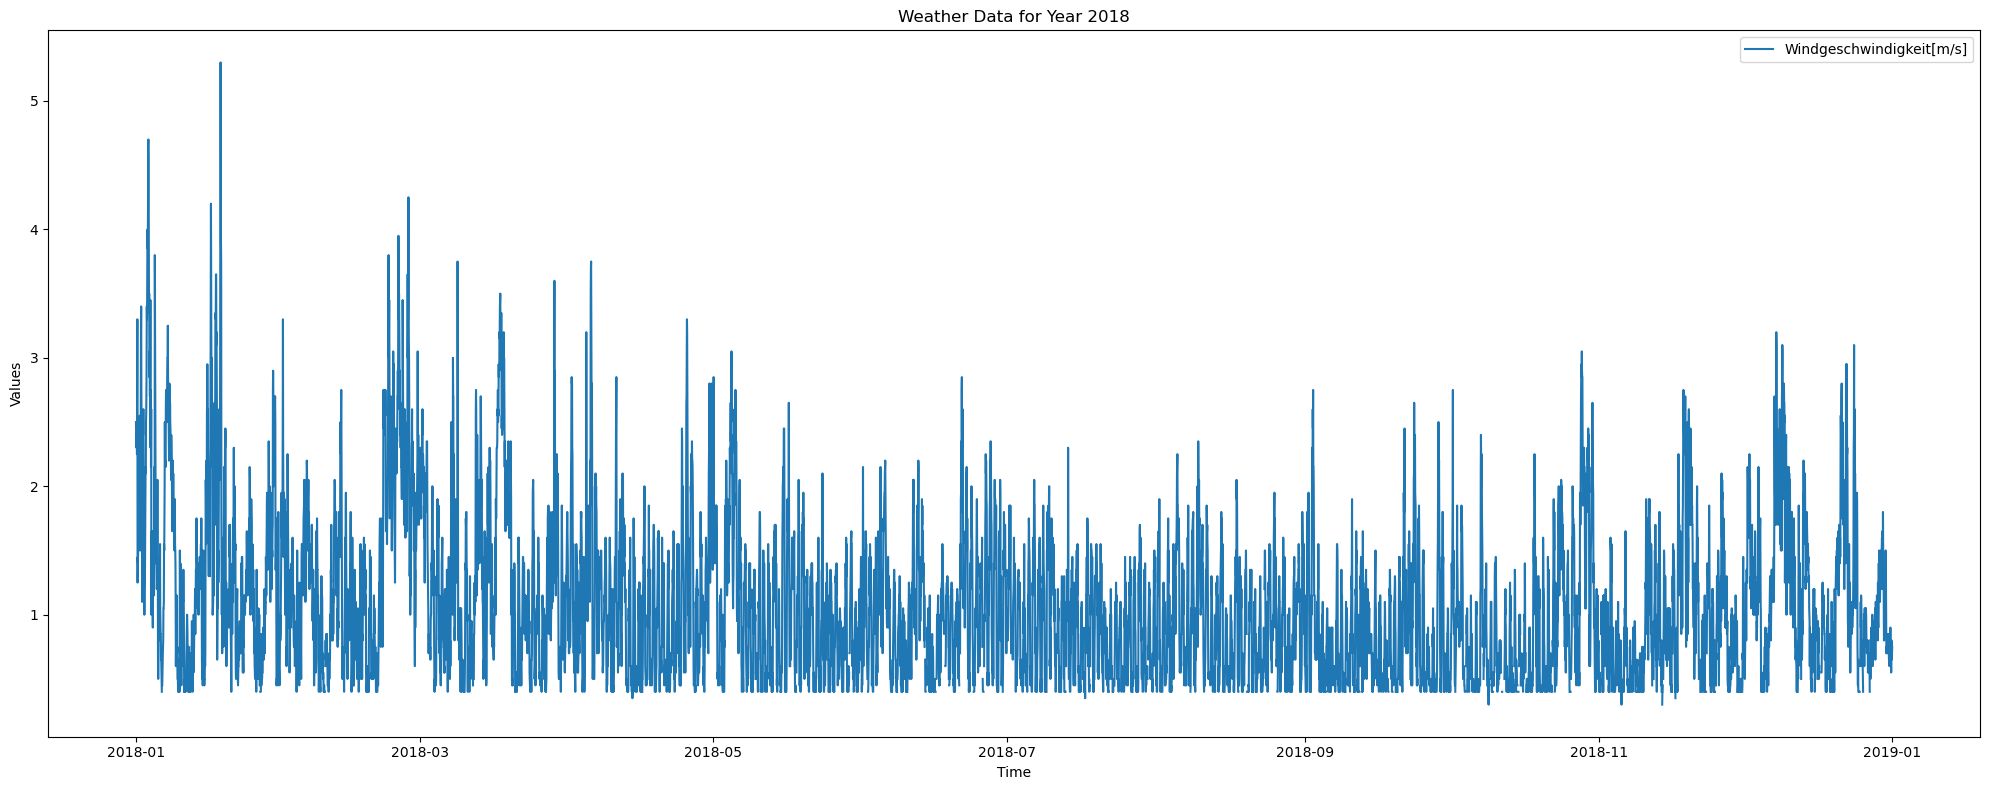

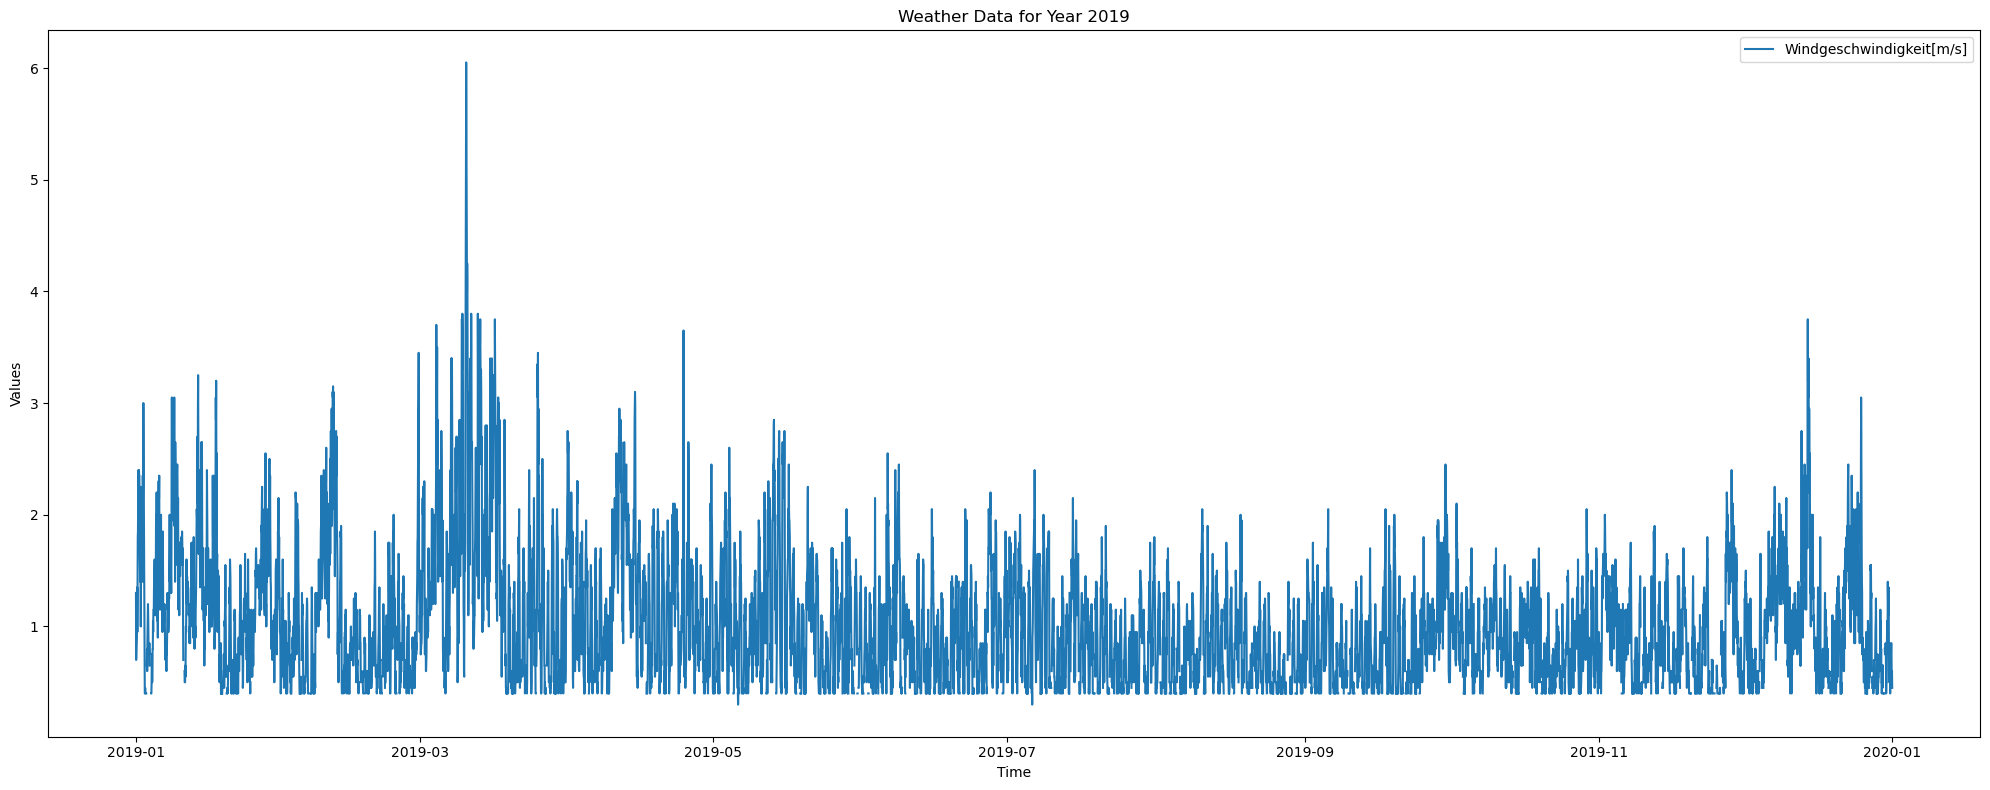

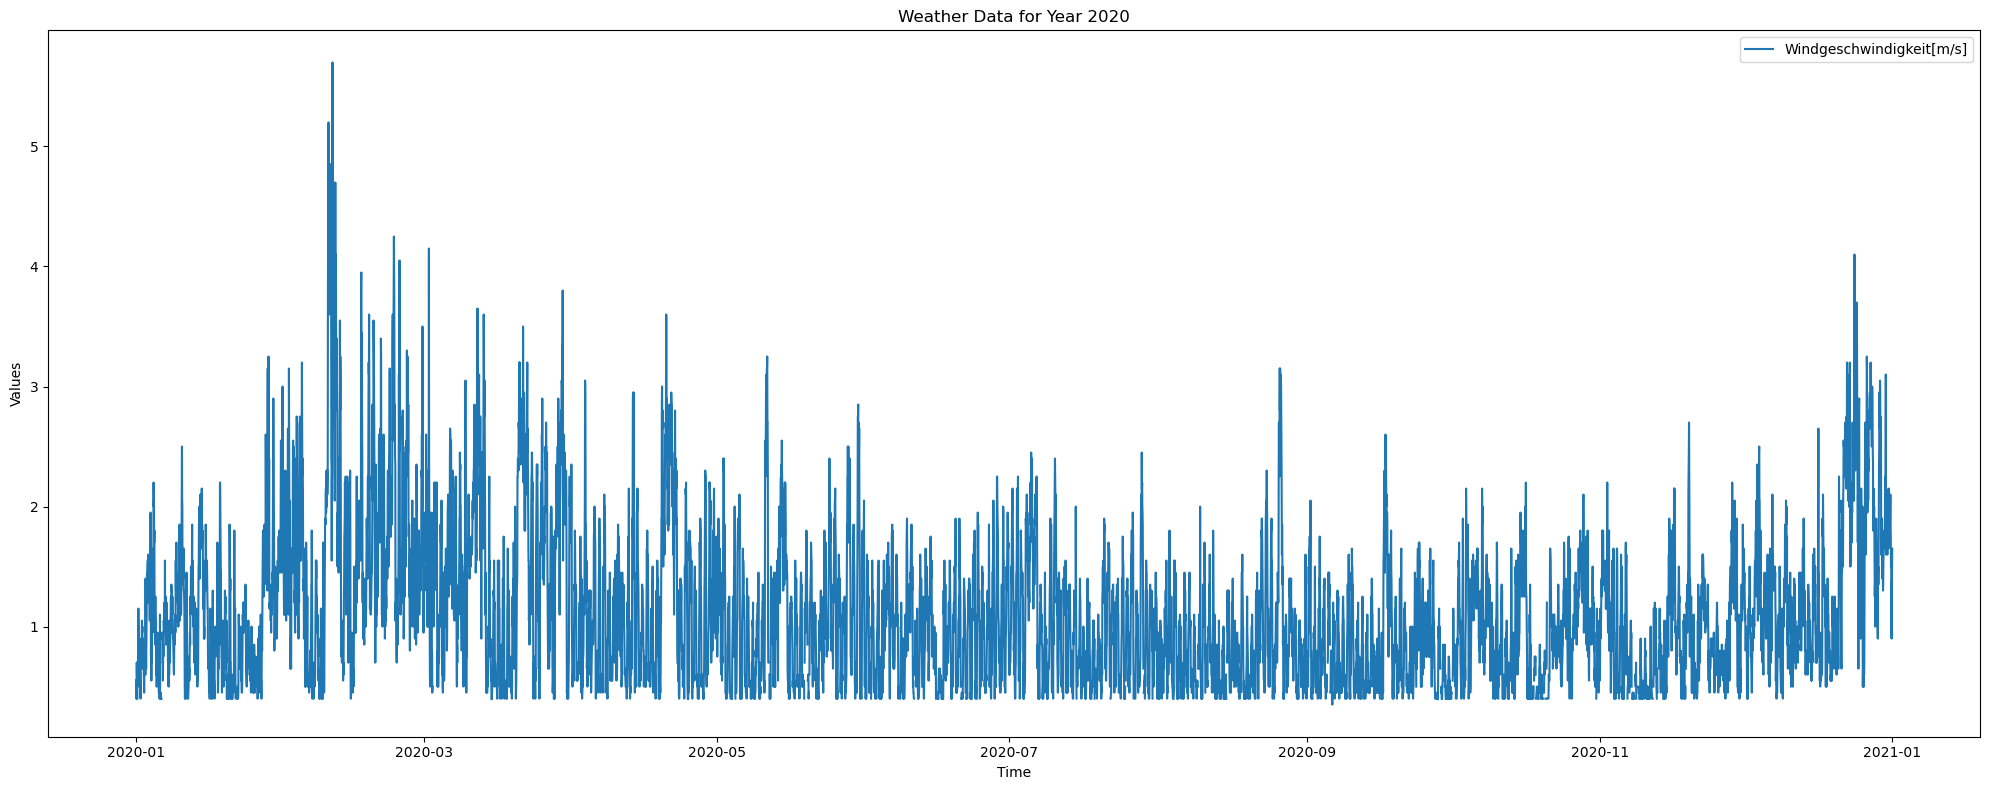

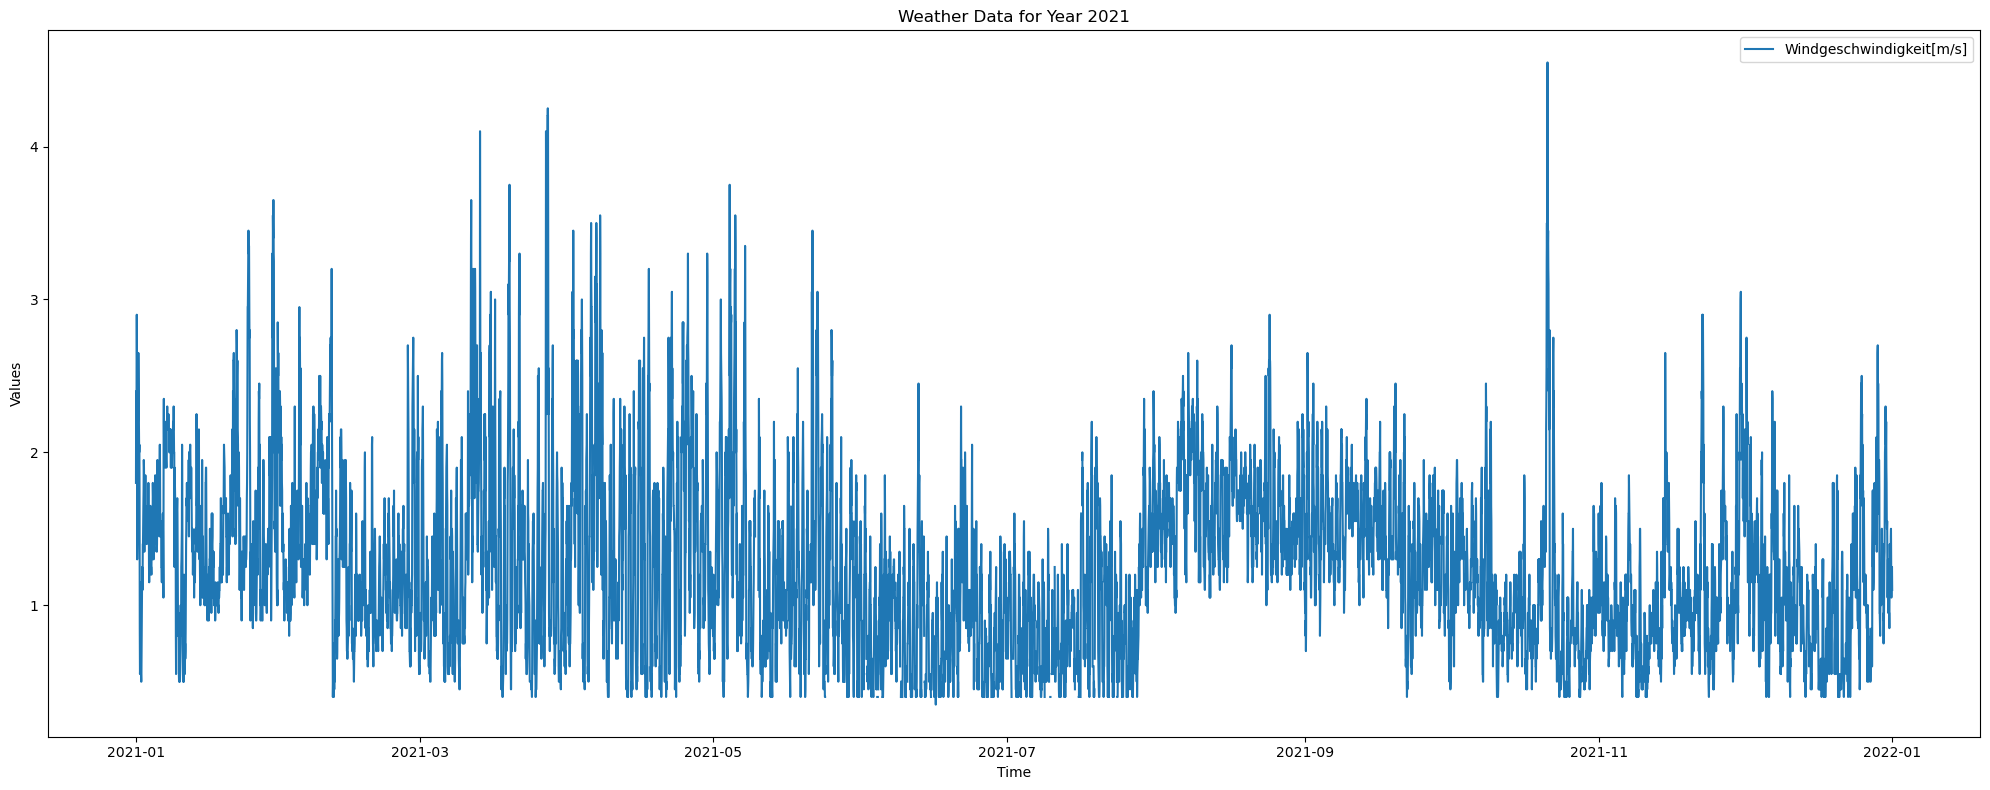

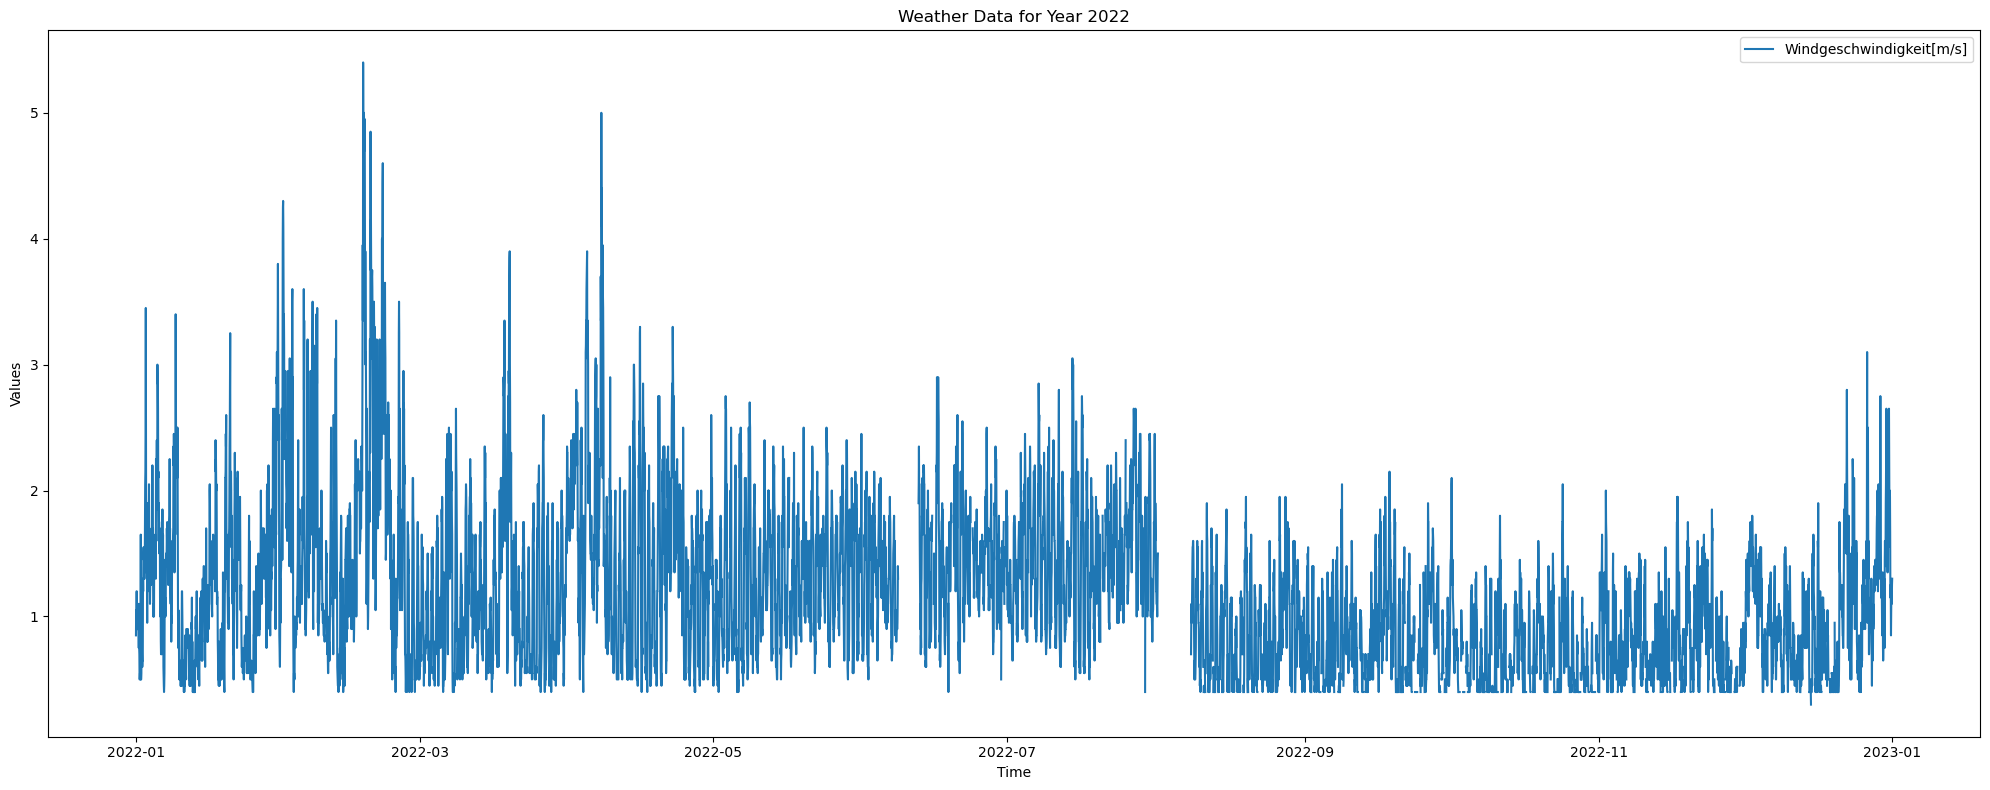

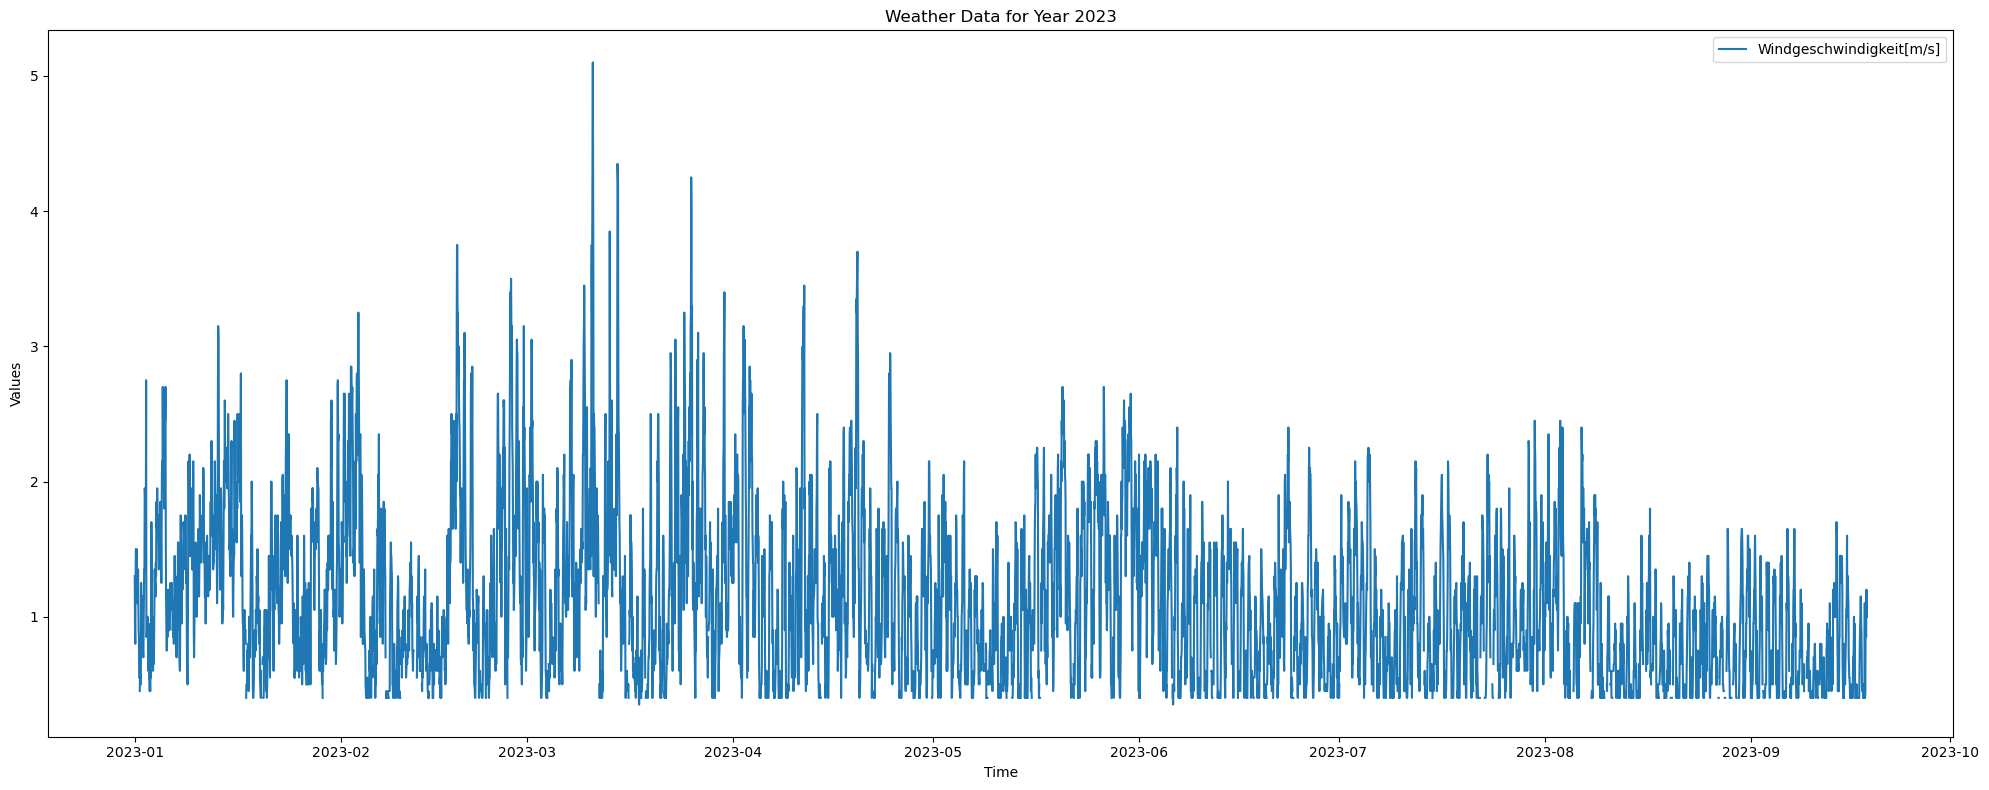

In [12]:
# weather data per year

unique_years = weather_data_plot['year'].unique()


# Create separate plots for each year
for i, year in enumerate(unique_years):
    plt.figure(figsize=(20, 8))
    year_data = weather_data_plot[weather_data_plot['year'] == year]
    
    #uncomment line per line to get different metrics plotted
    #plt.plot(year_data['datetime'], year_data['Luftdruck[hPa]'], label='Luftdruck[hPa]')
    #plt.plot(year_data['datetime'], year_data['Relative Luftfeuchtigkeit[%]'], label='Relative Luftfeuchtigkeit[%]')
    #plt.plot(year_data['datetime'], year_data['Temperatur[°C]'], label='Temperatur[°C]')
    plt.plot(year_data['timestamp'], year_data['Windgeschwindigkeit[m/s]'], label='Windgeschwindigkeit[m/s]')
    
    plt.title(f'Weather Data for Year {year}')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()

    
    # Show the plot for the current year
    plt.tight_layout()
    plt.show()

### Wind direction per year

In [14]:
wind_df = weather_data.copy()

In [15]:
wind_df.drop(columns = ['Luftdruck[hPa]', 'Relative Luftfeuchtigkeit[%]', 'Temperatur[°C]', 'Windgeschwindigkeit[m/s]'], inplace=True)

In [16]:
bins = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345, 375]  # Adjusted the bins

# Create labels for the batches
labels = ['30', '60', '90', '120', '150', '180', '210', '240', '270', '300', '330', '0']

# Use pd.cut() to map wind direction values to the specified bins and labels
wind_df['Wind_Direction_Batch'] = pd.cut(wind_df['Windrichtung[Grad]'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
wind_df

,timestamp,Windrichtung[Grad],Wind_Direction_Batch
0,2018-01-01 00:00:00,242.5,240
1,2018-01-01 01:00:00,236.5,240
2,2018-01-01 02:00:00,239.0,240
3,2018-01-01 03:00:00,240.0,240
4,2018-01-01 04:00:00,241.0,240
...,...,...,...
50070,2023-09-18 06:00:00,170.5,180
50071,2023-09-18 07:00:00,186.5,180
50072,2023-09-18 08:00:00,161.5,150
50073,2023-09-18 09:00:00,174.5,180


In [17]:
wind_df['month'] = wind_df['timestamp'].dt.month_name()
wind_df['year'] = wind_df['timestamp'].dt.year
wind_df

,timestamp,Windrichtung[Grad],Wind_Direction_Batch,month,year
0,2018-01-01 00:00:00,242.5,240,January,2018
1,2018-01-01 01:00:00,236.5,240,January,2018
2,2018-01-01 02:00:00,239.0,240,January,2018
3,2018-01-01 03:00:00,240.0,240,January,2018
4,2018-01-01 04:00:00,241.0,240,January,2018
...,...,...,...,...,...
50070,2023-09-18 06:00:00,170.5,180,September,2023
50071,2023-09-18 07:00:00,186.5,180,September,2023
50072,2023-09-18 08:00:00,161.5,150,September,2023
50073,2023-09-18 09:00:00,174.5,180,September,2023


In [30]:
wind_df.to_csv('winddirection.csv', index = False)